# Hybride Filtering - Page Rank x Cosine Similarity

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Load datas

In [3]:
from data.get_data import GetData

In [4]:
data = GetData()

## Page Rank x Cosine Similarity

Loading our python file and creating the PageRank objet containing the cosine similarity and Page Rank alghoritm.

In [5]:
from functions.page_rank import PageRank

In [6]:
page_rank = PageRank(data.df_train_purchases["item_id"].unique().tolist())

We create the adjacency matrix for Page Rank.

In [7]:
page_rank.create_adjacency_matrix(data.df_item_features, data.train_sessions, data.train_purchases, mode="session_to_purchase", g=1)

adj_matrix done


We create the similar matrix (cosine similarity).

In [8]:
page_rank.create_similar_matrix(data.df_item_features)

In [9]:
page_rank.process_page_rank(data.test_sessions, n_iter=1, validate_to_use=data.test_purchases)

array created
.1 iterations done
.........................................add session [0:4096]
array created
.1 iterations done
.........................................add session [4096:8192]
array created
.1 iterations done
...................add session [8192:10000]
Score: 0.17971331149852462


The score is 0.180 ! We can see that we have an improvement in the score better than Page Rank (score of 0.178) or Cosine Similarity (score of 0.054) !!!

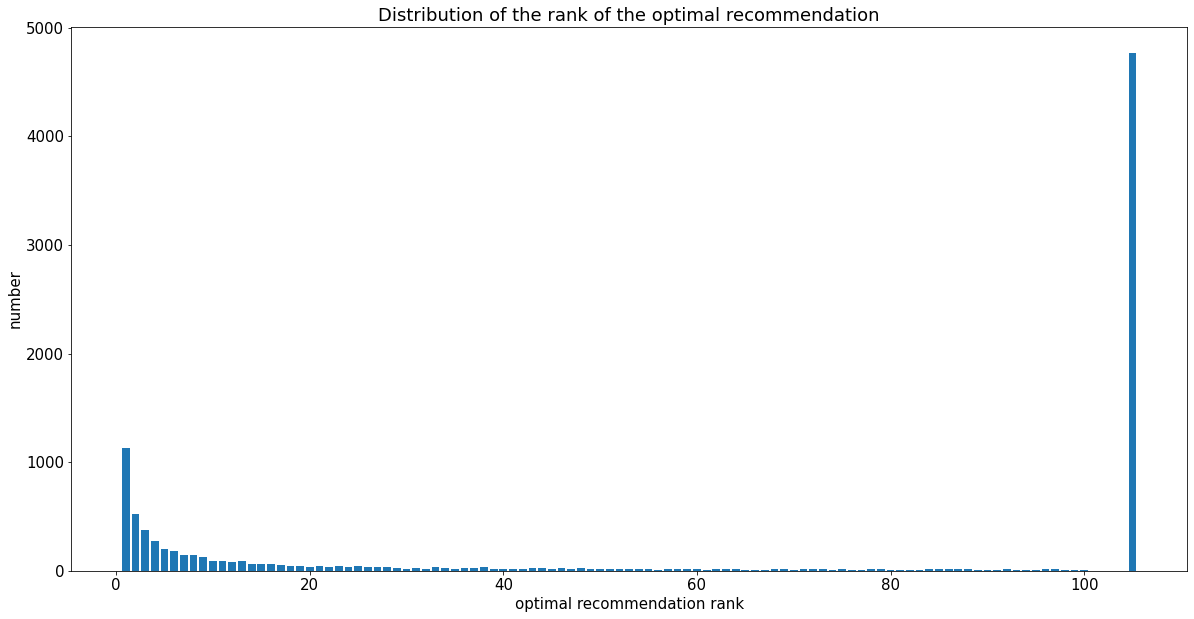

In [10]:
page_rank.show_distrib_rank()

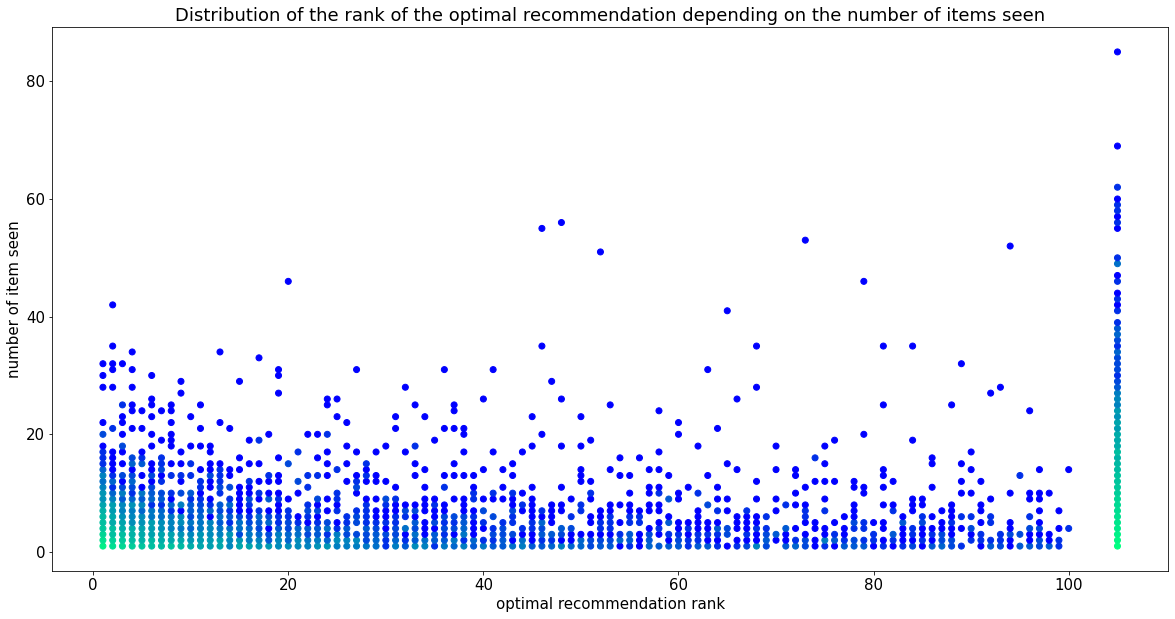

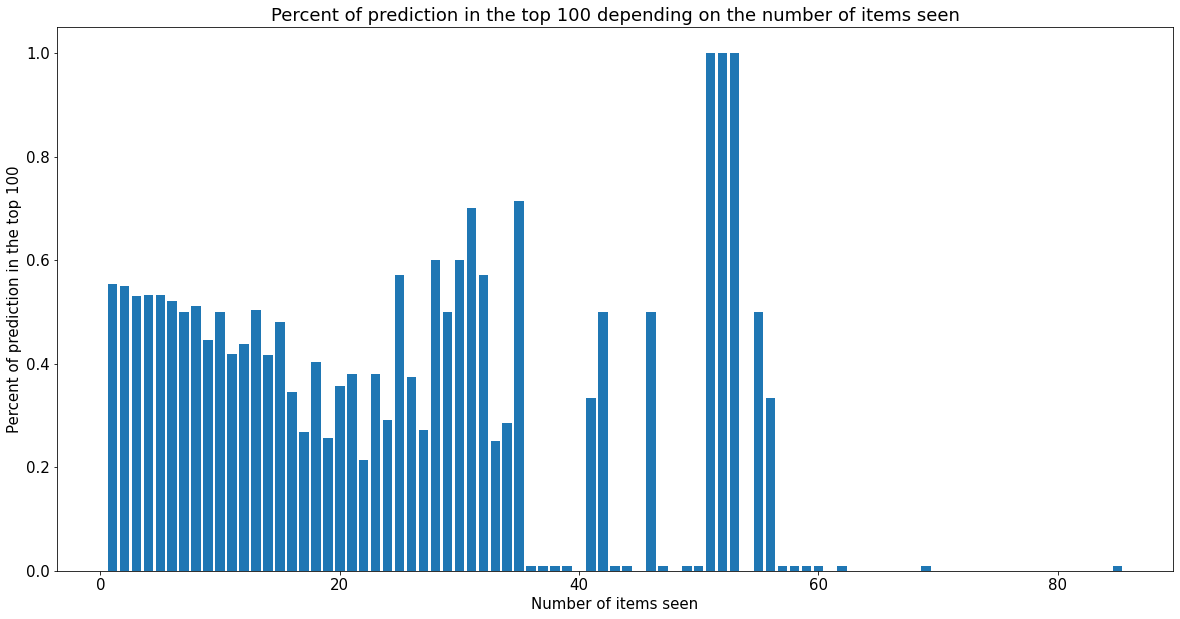

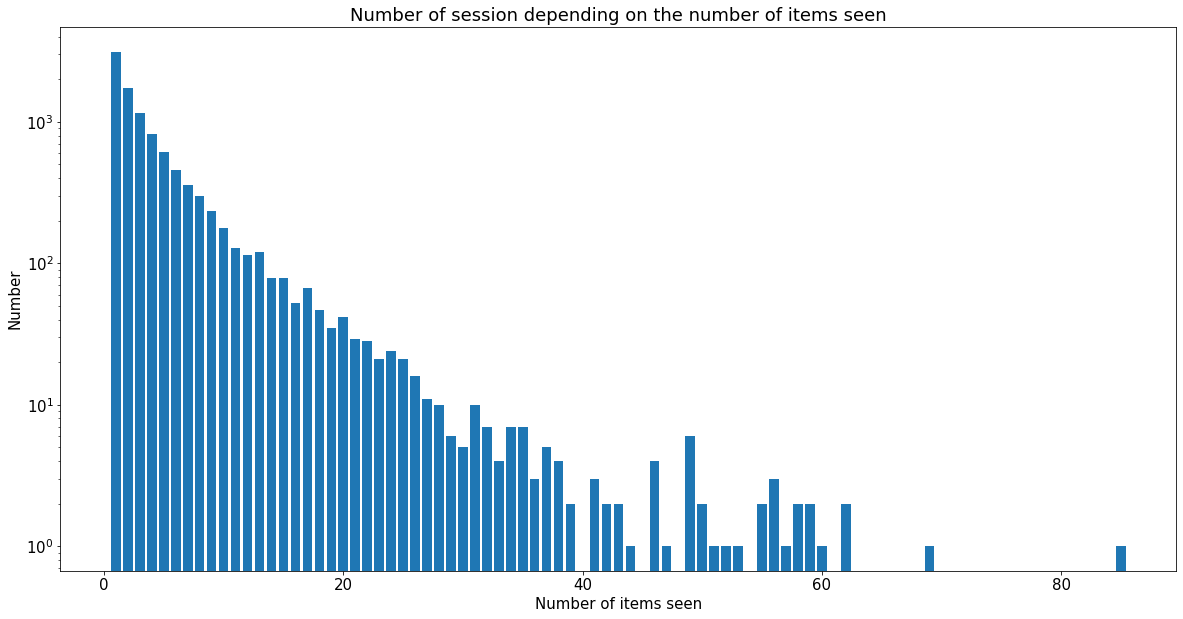

In [11]:
page_rank.show_stat_bad_sessions(data.test_sessions)

## Create result for leaderboard

This final section is used to create the csv file containing the predictions for the leaderboard datas.

In [12]:
page_rank = PageRank(data.list_candidate_items)

In [13]:
page_rank.create_adjacency_matrix(data.df_item_features, data.df_train_sessions, data.df_train_purchases, mode="session_to_purchase", g=1, leader=True)

adj_matrix done


In [14]:
page_rank.create_similar_matrix(data.df_item_features)

In [15]:
page_rank.process_page_rank(data.df_test_leaderboard_sessions, n_iter=1, save=True, last_seen_better=False, leader=True)

array created
.1 iterations done
.........................................add session [0:4096]
array created
.1 iterations done
.........................................add session [4096:8192]
array created
.1 iterations done
.........................................add session [8192:12288]
array created
.1 iterations done
.........................................add session [12288:16384]
array created
.1 iterations done
.........................................add session [16384:20480]
array created
.1 iterations done
.........................................add session [20480:24576]
array created
.1 iterations done
.........................................add session [24576:28672]
array created
.1 iterations done
.........................................add session [28672:32768]
array created
.1 iterations done
.........................................add session [32768:36864]
array created
.1 iterations done
.........................................add session [36864:40960]
array cr